# Load image data and run QUEST ion detection routine

{(0, 0): 0}
{(0, 0): 0}


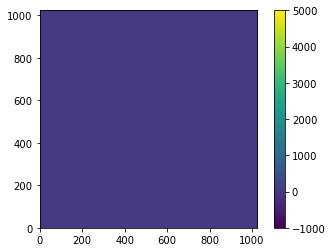

In [89]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

image = np.zeros((1024,1024))


#x = list(range(0,1024))
#y = list(range(0,1024))
x = 0
y = 0
value = 0

pixel = {(x,y):value}

print(pixel)
for xy, value in pixel:
    for i in range(1,1024+1):
        xy = i

plt.imshow(image, norm = matplotlib.colors.Normalize(vmin=-1000, vmax =5000))
plt.colorbar()
ax = plt.gca()

ax.set_xlim(0, 1024)
ax.set_ylim(0, 1024)

print(pixel)
plt.show()


ion detection with baseline 15357.4 and detection_threshold 30000.0
roi maximum 34994 at (538, 544)
detection threshold = 30000.0
recursively pixel searching at (538, 544)
recursively pixel searching at (539, 544)
recursively pixel searching at (539, 545)
recursively pixel searching at (538, 545)
recursively pixel searching at (538, 543)
potential ion found with S/N 2.1205970004078254
roi maximum 34239 at (851, 57)
detection threshold = 30000.0
recursively pixel searching at (851, 57)
potential ion found with S/N 2.229482807551357
roi maximum 29955 at (539, 543)
detection threshold = 30000.0
no pixel values above threshold

detected 2 ions: [(539.3842458434814, 545.1985380105561), (852.0, 58.0)]


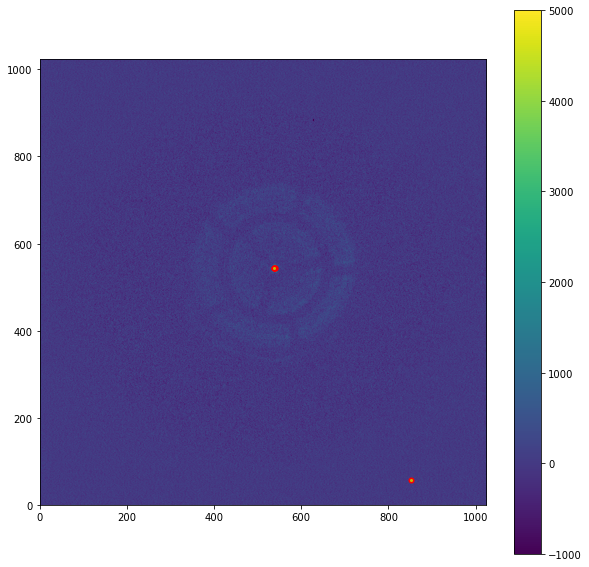

In [90]:
#3.Änderung: Punkt und Pixel vom Ion werden angezeigt und der Hintergrund wird subtrahiert
from driver import IonDetection, Roi, KinkDetection
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np



iondet = IonDetection()
iondet.read_file('single_ion.txt')

roi = Roi(0, 1024, 0, 1024)


image_data = iondet.image_data
ion_positions = [ion.get_position() for ion in iondet.detected_ion_list]


iondet.detect_ions(num_iterations=2, filter_sn=2.0, roi_list=[roi], merge_within=5, use_threshold=True, threshold=30000)



fig = plt.figure(figsize=(10, 10))

first_image = np.array(iondet.image_data)
iondet.read_file('single_ion_bgr.txt')
second_image = np.array(iondet.image_data)

if len(iondet.detected_ion_list) >= 1:
    print("\ndetected {} ions: {}".format(len(iondet.detected_ion_list), [ion.get_position() for ion in iondet.detected_ion_list]))
    
    image_copy = np.array(iondet.image_data)

    im = plt.imshow(image_copy, origin='lower')

    avgxlist = []
    avgylist = []

    xlist = []
    ylist = []

    for ion in iondet.detected_ion_list:
        x, y = ion.get_position()
        avgxlist.append(x-1)  # convert from base-1 pixels to base-0 pixels
        avgylist.append(y-1)
        
        for xy, value in ion.get_pixel_list().items():
            if value >= 1000:
                xlist.append(xy[0] - 1)
                ylist.append(xy[1] - 1)
            else:
                print("Pixel ignored")

    new_image = first_image - second_image
    plt.imshow(new_image, norm = matplotlib.colors.Normalize(vmin=-1000, vmax =5000))
    plt.colorbar()
    plt.plot(xlist, ylist, 'or', markersize = 5)
    ax = plt.gca()
    ax.set_xlim(0, 1024)
    ax.set_ylim(0, 1024)
    plt.plot(avgxlist, avgylist, 'oy', markersize = 2)
    

    plt.show()   
 


else :
    print("No Ions found.")
image_data = iondet.image_data
ion_positions = [ion.get_position() for ion in iondet.detected_ion_list]

print(ion)

ion detection with baseline 15357.4 and detection_threshold 30000.0
roi maximum 34994 at (538, 544)
detection threshold = 30000.0
recursively pixel searching at (538, 544)
recursively pixel searching at (539, 544)
recursively pixel searching at (539, 545)
recursively pixel searching at (538, 545)
recursively pixel searching at (538, 543)
potential ion found with S/N 2.1205970004078254
roi maximum 34239 at (851, 57)
detection threshold = 30000.0
recursively pixel searching at (851, 57)
potential ion found with S/N 2.229482807551357
roi maximum 29955 at (539, 543)
detection threshold = 30000.0
no pixel values above threshold

detected 2 ions: [(539.3842458434814, 545.1985380105561), (852.0, 58.0)]


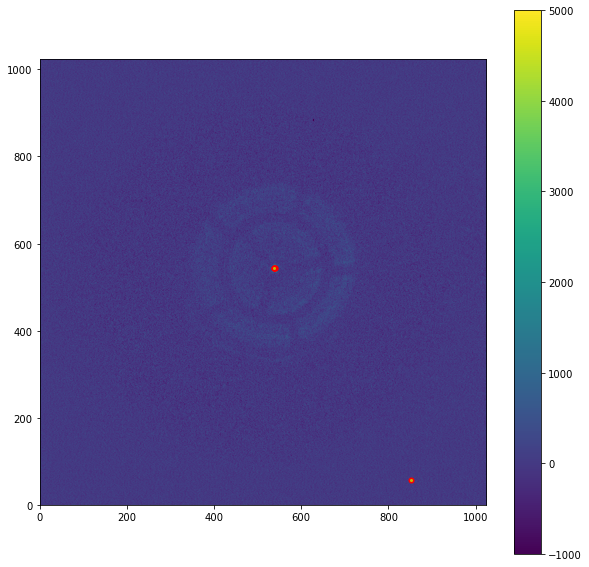

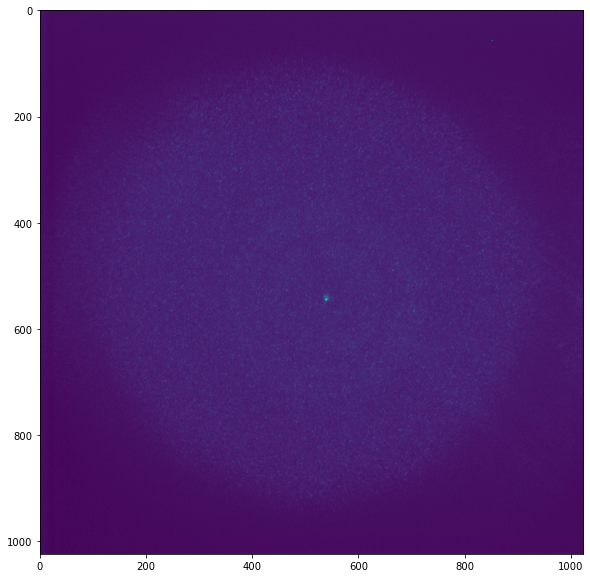

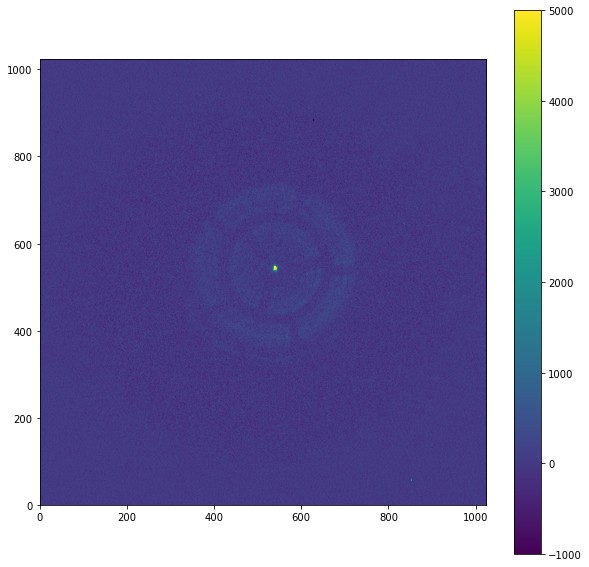

TypeError: 'int' object is not iterable

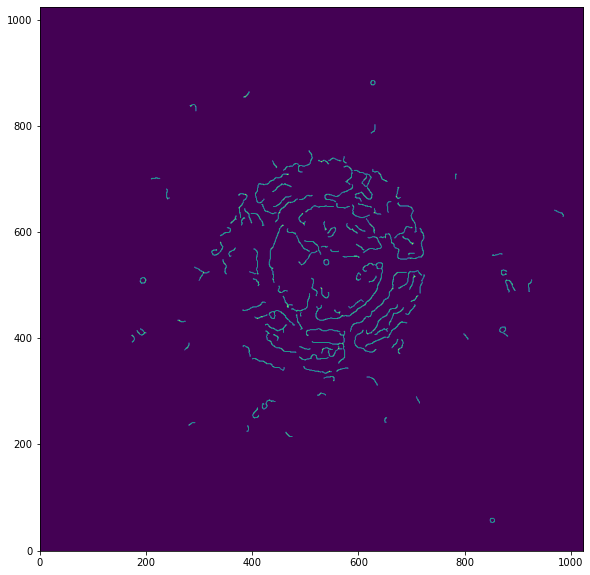

In [134]:
from driver  import IonDetection, Roi, KinkDetection, Ion
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import pandas as pd

#These are the extra modules I use
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny, peak_local_max
from skimage.draw import circle_perimeter

from PIL import Image






iondet = IonDetection()
iondet.read_file('single_ion.txt')

roi = Roi(0, 1024, 0, 1024)


image_data = iondet.image_data
ion_positions = [ion.get_position() for ion in iondet.detected_ion_list]


iondet.detect_ions(num_iterations=2, filter_sn=2.0, roi_list=[roi], merge_within=5, use_threshold=True, threshold=30000)



fig = plt.figure(figsize=(10, 10))

first_image = np.array(iondet.image_data)
iondet.read_file('single_ion_bgr.txt')
second_image = np.array(iondet.image_data)

if len(iondet.detected_ion_list) >= 1:
    print("\ndetected {} ions: {}".format(len(iondet.detected_ion_list), [ion.get_position() for ion in iondet.detected_ion_list]))
    
    image_copy = np.array(iondet.image_data)

    im = plt.imshow(image_copy, origin='lower')

    avgxlist = []
    avgylist = []

    xlist = []
    ylist = []

    for ion in iondet.detected_ion_list:
        x, y = ion.get_position()
        avgxlist.append(x-1)  # convert from base-1 pixels to base-0 pixels
        avgylist.append(y-1)
        
        for xy, value in ion.get_pixel_list().items():
            if value >= 1000:
                xlist.append(xy[0] - 1)
                ylist.append(xy[1] - 1)
            else:
                print("Pixel ignored")

    new_image = first_image - second_image
    plt.imshow(new_image, norm = matplotlib.colors.Normalize(vmin=-1000, vmax =5000))
    plt.colorbar()
    plt.plot(xlist, ylist, 'or', markersize = 5)
    ax = plt.gca()
    ax.set_xlim(0, 1024)
    ax.set_ylim(0, 1024)
    plt.plot(avgxlist, avgylist, 'oy', markersize = 2)
    

    plt.show()   
 
    #print(avgxlist[0])


else :
    print("No Ions found.")
image_data = iondet.image_data
ion_positions = [ion.get_position() for ion in iondet.detected_ion_list]

print(ion)


iondet = IonDetection()
iondet.read_file('single_ion_bgr.txt')
second_image = np.array(iondet.image_data)

iondet.read_file('single_ion.txt')
first_image = np.array(iondet.image_data)

fig = plt.figure(figsize=(10, 10))
plt.imshow(first_image)

roi = Roi(0, 1024, 0, 1024)

new_image = first_image - second_image

fig = plt.figure(figsize=(10, 10))

plt.imshow(new_image, norm = matplotlib.colors.Normalize(vmin=-1000, vmax =5000))
ax = plt.gca()
ax.set_xlim(0, 1024)
ax.set_ylim(0, 1024)
plt.colorbar()
plt.show()



# Load picture and detect edges
#image = image_data[100:400, 100:400]

#Canny is an edge detetction function
edges = canny(new_image, sigma=4, low_threshold=70, high_threshold=110)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
ax.imshow(edges, origin='lower')


# Detect radii for rings

for i in range(539,600):
    hough_radii = i
    
    
hough_res = hough_circle(edges, hough_radii)
# Select the 1000 most prominent circles in that sepcified range

accums, cx, cy, radii = hough_circle_peaks(hough_res,hough_radii, total_num_peaks=1000)

# Draw rings

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
image = color.gray2rgb(new_image)

for center_y, center_x, radius in zip(cy, cx, radii):
    if (ylist[int(len(ylist)-0.5*len(ylist))]-10) < center_y <(ylist[int(len(ylist)-0.5*len(ylist))]+10) and (xlist[int(len(xlist)-0.5*len(xlist))]-10) < center_x <(xlist[int(len(xlist)-0.5*len(xlist))]+10):
    #Only use the rings where the center lies on the ION (Need to find a way to determine these values I determined by hand lol)
        print("y:", center_y,"x:", center_x,"r:", radius)
        circy, circx = circle_perimeter(center_y, center_x, radius,shape=image.shape)
        image[circy, circx] = (220, 20, 20)


print(xlist)
print(ylist)
print(int(len(xlist)-0.5*len(xlist)))
print(int(len(ylist)-0.5*len(ylist)))
#End
ax.imshow(image, cmap=plt.cm.gray)
plt.show()

